In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import seaborn as sns
%pylab inline
import requests, re
import pandas as pd
import seaborn as sns
import nltk

import string, itertools
from collections import Counter, defaultdict
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.cluster import KMeans

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#  Part-1

In [4]:
# part1:

df1= pd.read_csv("filtered_reviews_part_1.csv")
df1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,T1iMdZeNzNRGB2SW_GYb-Q,Xy_6tT8l0Y5JNrSbL3_4uw,6PCHwjpYRMo1ZvY8m91bIg,3.0,1,0,0,If I were rating this place a few months ago i...,2015-12-29 22:09:28
1,y4GTzdMEgbMCnLSB3tvnMA,xUinwQIaC7G4B1OhrKJeOw,ALK-7tTvDKAzxAtIiNyh2A,5.0,0,0,0,Incredible food! Really unique combination of ...,2019-11-04 14:47:55
2,3yAQ2Chq47Dpap4nj-kUOg,pTdEM0c4El5cFwVAceLtNg,nqePY399khxYpBBpNjA_zw,5.0,0,0,0,A great local place to get great sandwiches. ...,2018-10-15 19:16:29
3,bs-cfyfjzQRTlT2RFsAHWw,jy9fiTWK-7liefYYkN4KnQ,h_d4fcmFsRFQYmvYaS2bzw,5.0,0,0,0,This is the real deal! I sat at the sushi bar...,2017-11-03 03:11:19
4,eZw0IfB9hYOjvigFX16Eeg,9sukFJd_IVRuDEv7MDHl6A,Cjb6F4tUM3B5Z7eV2lhfMg,5.0,0,0,0,Great neighborhood sushi place. Ask for the fa...,2015-05-18 00:34:33


In [5]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944894 entries, 0 to 944893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    944894 non-null  object 
 1   user_id      944894 non-null  object 
 2   business_id  944894 non-null  object 
 3   stars        944894 non-null  float64
 4   useful       944894 non-null  int64  
 5   funny        944894 non-null  int64  
 6   cool         944894 non-null  int64  
 7   text         944894 non-null  object 
 8   date         944894 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 64.9+ MB


In [6]:
avg_rating = df1['stars'].mean()
print(f"Average Rating: {avg_rating:.2f}")



review_counts = df1['business_id'].value_counts()
print(review_counts.head()) 

# Distribution of ratings
rating_distribution = df1['stars'].value_counts().sort_index()
print(rating_distribution)


Average Rating: 3.79
business_id
_ab50qdWOk0DdB6XOrBitw    1489
ac1AeYqs8Z4_e2X5M3if2A    1419
GXFMD0Z4jEVZBCsbPf4CTQ    1207
ytynqOUb3hjKeJfRj5Tshw    1138
iSRTaT9WngzB8JJ2YKJUig    1120
Name: count, dtype: int64
stars
1.0    113661
2.0     80587
3.0    108828
4.0    226249
5.0    415569
Name: count, dtype: int64


In [7]:
df1['date'] = pd.to_datetime(df1['date'])

reviews_per_month = df1.groupby(df1['date'].dt.to_period("M")).size()
print(reviews_per_month)
print(len(reviews_per_month))

date
2005-03      17
2005-04       6
2005-05      12
2005-06       6
2005-07      38
           ... 
2021-09    5978
2021-10    6703
2021-11    6063
2021-12    6480
2022-01    4167
Freq: M, Length: 203, dtype: int64
203


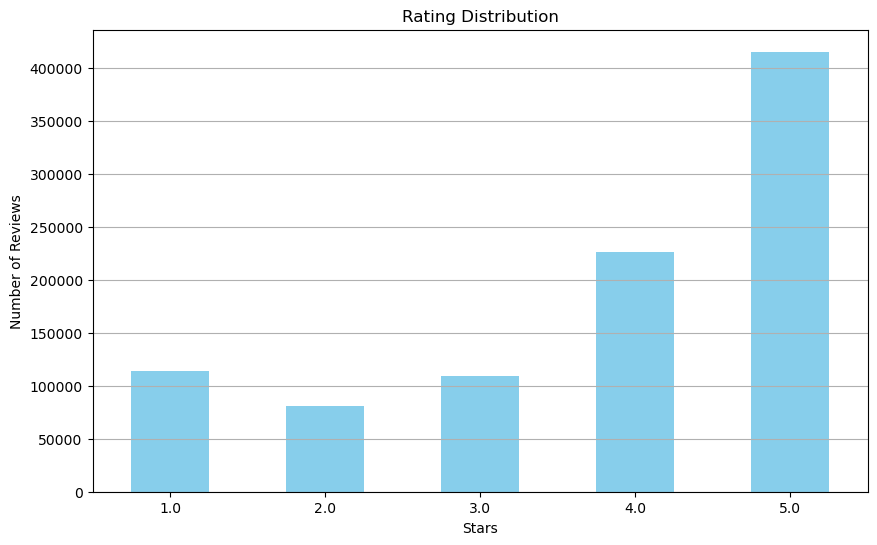

In [8]:
import matplotlib.pyplot as plt

rating_distribution = df1['stars'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10,6))
rating_distribution.plot(kind='bar', color='skyblue')
plt.title('Rating Distribution')
plt.xlabel('Stars')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944894 entries, 0 to 944893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    944894 non-null  object        
 1   user_id      944894 non-null  object        
 2   business_id  944894 non-null  object        
 3   stars        944894 non-null  float64       
 4   useful       944894 non-null  int64         
 5   funny        944894 non-null  int64         
 6   cool         944894 non-null  int64         
 7   text         944894 non-null  object        
 8   date         944894 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 64.9+ MB


In [10]:
df=pd.read_csv("ankur_100_sample_labels.csv")
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_no_stop,...,word_count,aspect,aspect_label,sentiment_polarity,reviews_per_business,Food Quality,Customer Service,Place,Menu & Price,Drinks
0,Hp3pIEuuk6t1RnKPTyt3hQ,-8oKMxks2GNqF9P41eE9LA,JnKdPqmgppB0CY7EuXaSCQ,5,0,0,0,really enjoyed this place gouda fondue app wa...,4/28/2013 6:11,really enjoyed place gouda fondue app deliciou...,...,30,4,Specific Dishes and Restaurant,0.683333,137,1.0,1.0,0.0,0.0,0.0
1,mh1TcChvFaI6m4jvM5aR4Q,yrntNCr9bxPmKEU3ncjw8A,mi7JfdCRLfxzFG71oW0I1g,4,1,0,0,best coffeeespresso in town\n\nive been search...,1/26/2019 20:06,best coffeeespresso town ive searching good qu...,...,81,3,Menu and Pricing,0.416667,10,0.0,0.0,0.0,0.0,1.0
2,4XGBkfQXxpghKSbmGwtLoQ,BX2MDfo93cMOdsvAQ4-WDA,9ugpNKKhnYRa51qXoxUw_A,5,0,0,0,came here for dinner last night and the tacos ...,3/26/2016 1:45,came dinner last night tacos great lot meat sa...,...,24,2,Overall Experience,0.600000,237,1.0,0.0,0.0,0.0,0.0
3,YhaWL-ioYp7dRjIMd8Z-gw,lcgjvFXX-dtvGvwXJ-UqDg,bKbvmpGy_L96qVtNeR_HNA,5,1,0,0,i just wanted to thank himalayan hut for the s...,5/5/2020 2:44,wanted thank himalayan hut service theyve prov...,...,87,1,Service and Wait Time,0.029167,19,1.0,1.0,0.0,0.0,0.0
4,1Jo-xTnxSybbs1v8rcTW_A,hoegTWA35mCxzi59DkZNng,iUZEGx29miZObLd6_lt7Vg,5,0,0,0,love the huevos rancheros here i make it a poi...,1/28/2018 0:18,love huevos rancheros make point eat breakfast...,...,30,2,Overall Experience,0.400000,349,1.0,0.0,0.0,0.0,0.0


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review_id             100 non-null    object 
 1   user_id               100 non-null    object 
 2   business_id           100 non-null    object 
 3   stars                 100 non-null    int64  
 4   useful                100 non-null    int64  
 5   funny                 100 non-null    int64  
 6   cool                  100 non-null    int64  
 7   text                  100 non-null    object 
 8   date                  100 non-null    object 
 9   text_no_stop          100 non-null    object 
 10  text_stemmed          100 non-null    object 
 11  review_length         100 non-null    int64  
 12  word_count            100 non-null    int64  
 13  aspect                100 non-null    int64  
 14  aspect_label          100 non-null    object 
 15  sentiment_polarity    10

In [12]:
# Find common review_ids
common_review_ids = df1[df1['review_id'].isin(df['review_id'])]['review_id']

# Filter out these common review_ids from df1
df1_filtered = df1[~df1['review_id'].isin(common_review_ids)]

# Now df1_filtered contains the rows from df1 where review_id is not in df


In [13]:
df1_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 944794 entries, 0 to 944893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    944794 non-null  object        
 1   user_id      944794 non-null  object        
 2   business_id  944794 non-null  object        
 3   stars        944794 non-null  float64       
 4   useful       944794 non-null  int64         
 5   funny        944794 non-null  int64         
 6   cool         944794 non-null  int64         
 7   text         944794 non-null  object        
 8   date         944794 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 72.1+ MB


In [14]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Stratify based on 'stars' column
split = StratifiedShuffleSplit(n_splits=5, test_size=600, random_state=42)

# Generating the stratified samples and adding aspect labels
for i, (train_index, test_index) in enumerate(split.split(df1_filtered, df1_filtered['stars'])):
    strat_sample = df1_filtered.iloc[test_index]

    # Create aspect_labels_df with the same number of rows as strat_sample
    aspect_labels_df = pd.DataFrame({
        'Food Quality': [None] * len(strat_sample),
        'Customer Service': [None] * len(strat_sample),
        'Place': [None] * len(strat_sample),
        'Menu_and_Pricing': [None] * len(strat_sample),
        'Drinks': [None] * len(strat_sample)
    })

    # Concatenate strat_sample with aspect_labels_df
    final_sample = pd.concat([strat_sample, aspect_labels_df], axis=1)

    # Export to CSV
    filename = f'stratified_sample_{i+1}.csv'
    final_sample.to_csv(filename, index=False)
    print(f'Sample {i+1} saved as {filename}')


Sample 1 saved as stratified_sample_1.csv
Sample 2 saved as stratified_sample_2.csv
Sample 3 saved as stratified_sample_3.csv
Sample 4 saved as stratified_sample_4.csv
Sample 5 saved as stratified_sample_5.csv


In [15]:
sample_df = pd.read_csv('stratified_sample_1.csv')
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_id         600 non-null    object 
 1   user_id           600 non-null    object 
 2   business_id       600 non-null    object 
 3   stars             600 non-null    float64
 4   useful            600 non-null    float64
 5   funny             600 non-null    float64
 6   cool              600 non-null    float64
 7   text              600 non-null    object 
 8   date              600 non-null    object 
 9   Food Quality      0 non-null      float64
 10  Customer Service  0 non-null      float64
 11  Place             0 non-null      float64
 12  Menu_and_Pricing  0 non-null      float64
 13  Drinks            0 non-null      float64
dtypes: float64(9), object(5)
memory usage: 131.3+ KB


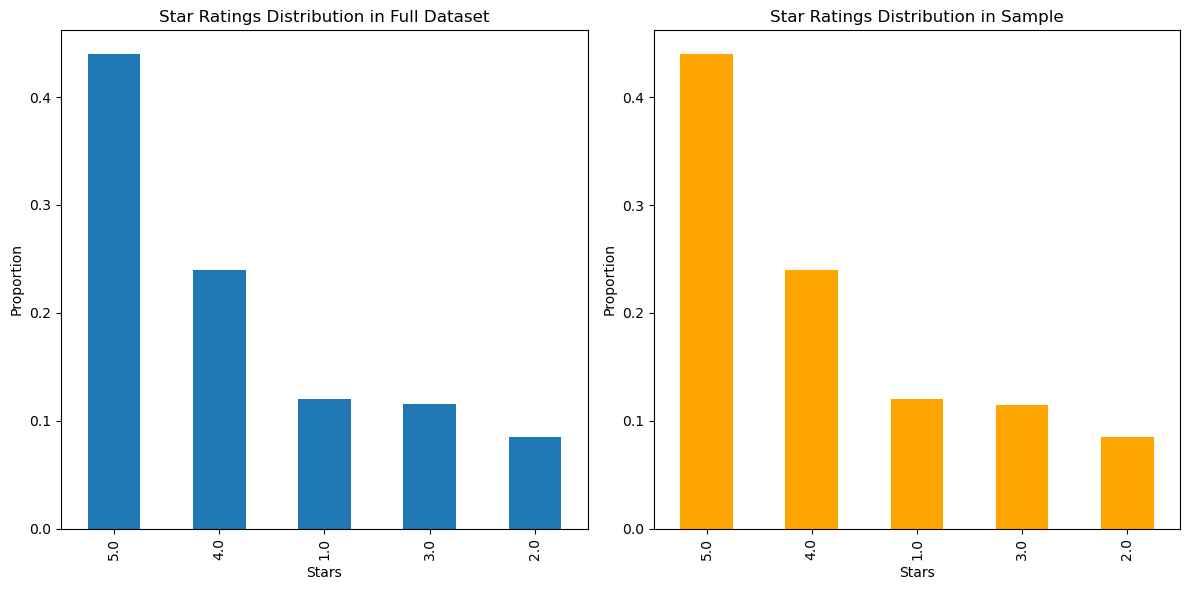

In [16]:
star_dist_full = df1_filtered['stars'].value_counts(normalize=True)

# Distribution in the sample
star_dist_sample = sample_df['stars'].value_counts(normalize=True)

# Plotting for comparison
plt.figure(figsize=(12, 6))

# Plot for the full dataset
plt.subplot(1, 2, 1)
star_dist_full.plot(kind='bar')
plt.title('Star Ratings Distribution in Full Dataset')
plt.xlabel('Stars')
plt.ylabel('Proportion')

# Plot for the sample dataset
plt.subplot(1, 2, 2)
star_dist_sample.plot(kind='bar', color='orange')
plt.title('Star Ratings Distribution in Sample')
plt.xlabel('Stars')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()
